In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
from scipy.integrate import quad, trapz
import pandas as pd

sns.set(palette="rocket")
palette = sns.color_palette("rocket", 10)
pd.set_option("display.precision", 12)

# Zadanie 1.

In [160]:
# Dane
m = 2000  # masa samochodu [kg]
v1 = 1.0  # początkowa prędkość [m/s]
v2 = 6.0  # końcowa prędkość [m/s]

# Wartości prędkości i mocy
velocities = np.array([0, 1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0])
powers = np.array([0, 4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2])

Wiemy, że 

$$ \Delta t  = m*\int_{v_1}^{v_2} \frac{v}{P}dv.$$

Chcemy, zatem wyznaczyć numerycznie całkę $ \int_{v_1}^{v_2} \frac{v}{P}dv $. 

Jako, że nasze dane są dyskretne postanowiliśmy użyć Metody Trapetzów do obliczenia całki.

Złożony wzór trapezów dla przedziału [a,b] wygląda następująco:

$$ S(f) = h \left( \frac{f(a)}{2} + \sum_{i=1}^{n-1} f(a+ih) + \frac{f(b)}{2}\right). $$

In [161]:
def trapezoidal_rule(f, a, b, n):
    """
    Funkcja obliczająca całkę numeryczną przy użyciu metody trapezów.

    Parametry:
    - f: funkcja do zintegrowania
    - a: dolna granica całkowania
    - b: górna granica całkowania
    - n: liczba trapezów

    Zwraca:
    - Wynik całkowania numerycznego
    """
    h = (b - a) / n
    result = (f(a) + f(b)) / 2

    for i in range(1, n):
        result += f(a + i * h)

    result *= h
    return result

In [162]:
def f1(v):
    """
    Funkcja zwracająca wartość mocy dla danej prędkości.

    Parametry:
    - v: prędkość

    Zwraca:
    - Wartość predkosc podzielona przez moc
    """
    return v / interpolate.interp1d(velocities, powers)(v)

n = len(velocities)

result = trapezoidal_rule(f1, v1, v2, n)

print(f"Czas potrzebny na rozpędzenie samochodu od {v1} m/s do {v2} m/s: {result*m} s")

Czas potrzebny na rozpędzenie samochodu od 1.0 m/s do 6.0 m/s: 1291.6648957307898 s


Zdecydowaliśmy się również wykonać interpolację dla sprawdzenia, czy pozowli nam to na uzyskanie dokładniejszych wyników. W tym celu użyliśmy funkcji `interp1d` z biblioteki `scipy.interpolate`. Funkcja ta przyjmuje jako argumenty wektor x, wektor y oraz rodzaj interpolacji. W naszym przypadku wybraliśmy interpolację liniową. Funkcja zwraca funkcję, która przyjmuje jako argument wektor x i zwraca wektor y.

In [163]:
# Interpolacja numeryczna
power_interpolation = interpolate.interp1d(velocities, powers, kind='linear')

# Funkcja do całkowania
def integrand(v):
    power = power_interpolation(v)
    return v / power

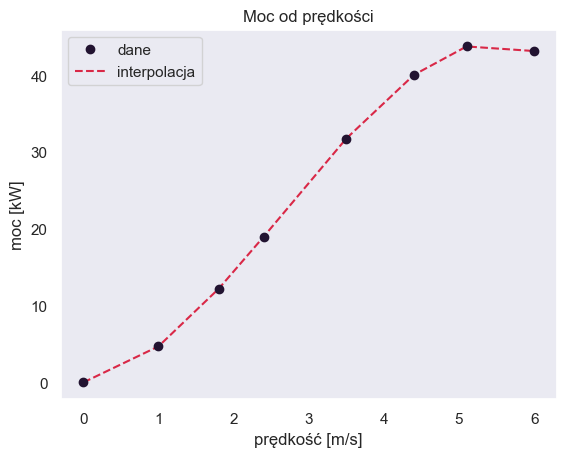

In [164]:
# wykres mocy od prędkości z interpolacją

fig, ax = plt.subplots()
ax.plot(velocities, powers, 'o', label='dane', zorder=10, color = palette[0])
ax.plot(np.linspace(0, 6, 100), power_interpolation(np.linspace(0, 6, 100)), label='interpolacja', linestyle = '--', color = palette[5])
ax.set(xlabel='prędkość [m/s]', ylabel='moc [kW]')
ax.grid()
ax.legend()
ax.set_title('Moc od prędkości');

Dla sprawdzenia wyników jeszcze jedną metodą, zaimplementowaliśmy również metodę Simpsona. 

Złożony wzór Simpsona dla przedziału [a,b] wygląda następująco:

$$ S(f) = \frac{h}{3} \left( f(a) + 2\sum_{i=1}^{n/2-1} f(a+2ih) + 4\sum_{i=1}^{n/2} f(a+(2i-1)h) + f(b) \right). $$

In [178]:
def simpsons_rule(f, a, b, nodes):
    """
    Oblicza przybliżoną wartość całki funkcji f na przedziale [a, b] za pomocą wzoru Simpsona.

    Parametry:
    - f: Funkcja, której całkę przybliżamy.
    - a: Dolna granica całkowania.
    - b: Górna granica całkowania.
    - nodes: Liczba węzłów.
    
    Zwraca: 
    - Przybliżona wartość całki.
    """
    
    if nodes % 2 == 0:
        raise ValueError("Liczba węzłów musi być nieparzysta.")
    
    n = nodes - 1 # liczba podprzedziałów
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)

    result = h / 3 * (y[0] + 2 * np.sum(y[2:n-1:2]) + 4 * np.sum(y[1:n:2]) + y[n])
    return result

Wyniki dwóch metod porównaliśmy z wynikami analitycznymi.

In [180]:
# liczba trapezow
n = 100
result_trapezoidal = trapezoidal_rule(integrand, v1, v2, n=n)

# liczba węzłów
w = 101
result_simpsons = simpsons_rule(integrand, v1, v2, w=w)

delta_t_trapezoidal = m * result_trapezoidal
delta_t_simpsons = m * result_simpsons

result_scipy = quad(integrand, v1, v2)[0]
delta_t_scipy = m * result_scipy

print(f"Czas potrzebny na rozpędzenie samochodu od {v1} m/s do {v2} m/s:")
print(f"Funkcja wbudowana quad: {delta_t_scipy:.2f} s")
print(f"Metoda Simpsona: {delta_t_simpsons:.2f} s")
print(f"Metoda trapezów: {delta_t_trapezoidal:.2f} s")

Czas potrzebny na rozpędzenie samochodu od 1.0 m/s do 6.0 m/s:
Funkcja wbudowana quad: 1277.50 s
Metoda Simpsona: 1277.50 s
Metoda trapezów: 1277.60 s


# Zadanie 2.

Do policzenia mamy całke:

$$ \int_{-1}^{1} \cos(2 \cos^{-1}x) \text{d}x .$$

Skorzystamy z implementacji metody Simpsona, które omówliśmy i zaimplementowaliśmy we wcześniejszym zadaniu.

In [193]:
f2 = lambda x : np.cos(2 * np.arccos(x))

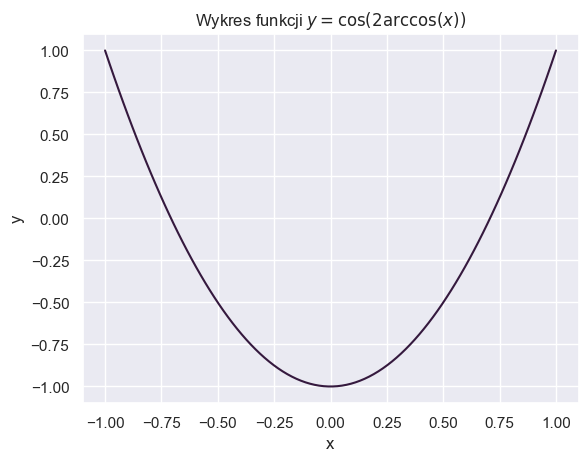

In [198]:
# wykres funkcji

fig, ax = plt.subplots()
x = np.linspace(-1, 1, 100)
ax.plot(x, f2(x))
ax.set(xlabel='x', ylabel='y')
ax.set_title(r'Wykres funkcji $ y = \cos(2 \arccos(x))$');

In [186]:
# obliczenie calki dla 3, 5 i 7 wezlow

a = -1
b = 1

nodes = [3, 5, 7]

for node in nodes:
    result = simpsons_rule(f2, a, b, node)
    print(f"wezel = {node}, wynik = {result}")
    
# porowanie wynikow z biblioteka scipy

result = quad(f2, a, b)

print(f"Wynik z biblioteki scipy: {result[0]}")

wezel = 3, wynik = -0.6666666666666666
wezel = 5, wynik = -0.6666666666666665
wezel = 7, wynik = -0.6666666666666666
Wynik z biblioteki scipy: -0.6666666666666666


Dla przeanalizowania wyników zobrazowaliśmy również błąd względny w zależności od liczby przedziałów całkowania, czyli od liczby węzłów.

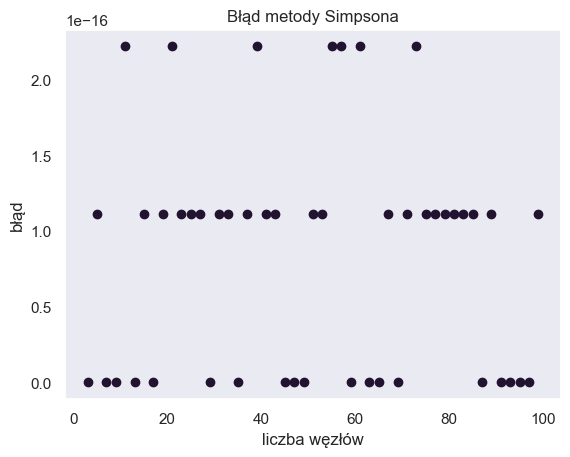

In [192]:
# wykres błędów metody Simpsona

nodes = np.arange(3, 100, 2)

errors = []

for n in nodes:
    errors.append(np.abs(simpsons_rule(f2, a, b, n) - result[0]))
    
fig, ax = plt.subplots()
ax.scatter(nodes, errors, color = palette[0])
ax.set(xlabel='liczba węzłów', ylabel='błąd')
ax.grid()
ax.set_title('Błąd metody Simpsona');

Widzimy, że błędy nie zmniejszają się wraz ze zwiększaniem liczby węzłów. Może to wynikać z faktu, że funkcja jest parzysta.

# Zadanie 3.

Zaczeliśmy od przekszałcenia całki z zadania przy pomocy podstawienia $t = \frac{1}{x}$: 

$$\int_{1}^{\infty} (1+x^4)^{-1} \text{d}x = \frac{1}{3} \int_0^1 \frac{1}{t^{\frac{4}{3}}+1} \text{d}x.$$

Wykorzystaliśmy do tego zaimplementowaną wcześniej metodę trapezów oraz porównaliśmy wyniki z funkcjami `quad` oraz `trapz` z biblioteki `scipy.integrate`.

In [122]:
f3 = lambda t : (1/3)*(1/(t**(4/3)+1))

a = 0
b = 1
n = 6

result_trapez = trapezoidal_rule(f3, a, b, 6)
result_scipy_quad = quad(f3, a, b)
result_scipy_trapz = trapz(f3(np.linspace(a, b, n+1)), np.linspace(a, b, n+1))

print(f"Wynik z metody trapezów: {result_trapez}")
print(f"Wynik z biblioteki scipy przy użyciu funkcji quad: {result_scipy_quad[0]}")
print(f"Wynik z biblioteki scipy przy użyciu funkcji trapz: {result_scipy_trapz}")

Wynik z metody trapezów: 0.24369906525637575
Wynik z biblioteki scipy przy użyciu funkcji quad: 0.24374774720415943
Wynik z biblioteki scipy przy użyciu funkcji trapz: 0.24369906525637572


# Zadanie 4.

Zadanie polegało na policzeniu całki:

$$ \int_{0}^{\frac{\pi}{2}} \frac{\text{d}\theta}{\sqrt{1- \sin^2(\theta_0/2)\sin^2(\theta)}}  $$

dla różnych wartości $\theta_0$.

Zrobiliśmy to przy pomocy zaimplementowanych wcześniej metody trapezów i Simpsona oraz funkcji `quad` z biblioteki `scipy.integrate`.

In [218]:
def h(theta_0, theta):
    return 1 / np.sqrt(1 - np.sin(theta_0 / 2) ** 2 * np.sin(theta) ** 2)

def h_trapezoidal_rule(theta_0, a, b, n):
    return trapezoidal_rule(lambda theta: h(theta_0, theta), a, b, n)

def h_simpsons_rule(theta_0, a, b, nodes):
    return simpsons_rule(lambda theta: h(theta_0, theta), a, b, nodes)

thetas_0 = np.radians(np.array([0, 15, 30, 45]))
a = 0
b = np.pi / 2
n = 100

for theta_0 in thetas_0:
    result_trapezoidal = h_trapezoidal_rule(theta_0, a, b, n)
    result_simpsons = h_simpsons_rule(theta_0, a, b, n+1)
    print(f"theta_0 = {np.degrees(theta_0):.0f} stopni")
    print(f"Wynik z metody trapezów: {result_trapezoidal:.5f}")
    print(f"Wynik z metody Simpsona: {result_simpsons:.5f}")
    print(f"Wynik z biblioteki scipy: {quad(lambda theta: h(theta_0, theta), a, b)[0]:.5f}")
    print()

print(f"pi/2 = {np.pi / 2:.5f}")

theta_0 = 0 stopni
Wynik z metody trapezów: 1.57080
Wynik z metody Simpsona: 1.57080
Wynik z biblioteki scipy: 1.57080

theta_0 = 15 stopni
Wynik z metody trapezów: 1.57755
Wynik z metody Simpsona: 1.57755
Wynik z biblioteki scipy: 1.57755

theta_0 = 30 stopni
Wynik z metody trapezów: 1.59814
Wynik z metody Simpsona: 1.59814
Wynik z biblioteki scipy: 1.59814

theta_0 = 45 stopni
Wynik z metody trapezów: 1.63359
Wynik z metody Simpsona: 1.63359
Wynik z biblioteki scipy: 1.63359

pi/2 = 1.57080


Widzimy, że wyniki są zgodne.

Dla wizualizacji wyników narysowaliśmy wykresy zależności wyniku od $\theta_0$ oraz funckję podcałkową dla różnych wartości $\theta_0$.

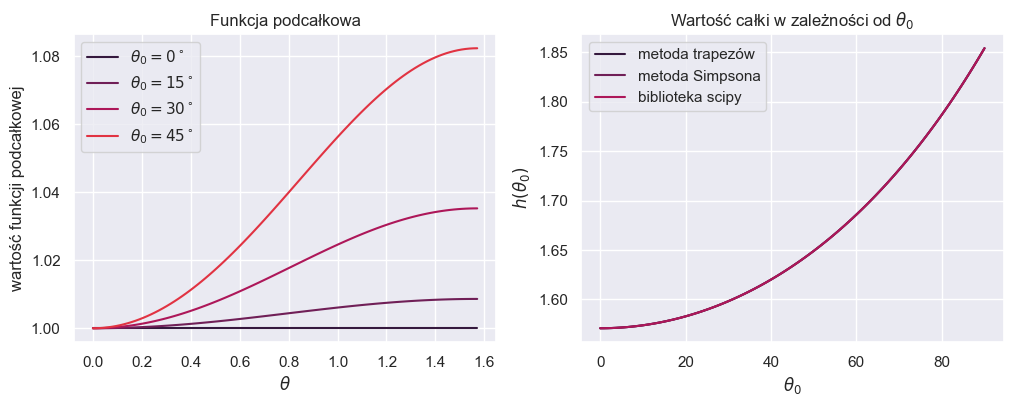

In [230]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

thetas_0 = np.radians(np.array([0, 15, 30, 45]))

thetas = np.linspace(0, np.pi / 2, 100)
for theta_0 in thetas_0:
    sns.lineplot(x = thetas, y = h(theta_0, thetas), label=f"$\\theta_0 = {np.degrees(theta_0):.0f}^\\circ$", ax=ax[0])
    
ax[0].set(xlabel="$\\theta$", ylabel="wartość funkcji podcałkowej")
ax[0].legend()
ax[0].set_title("Funkcja podcałkowa")

thetas_0 = np.radians(np.linspace(0, 90, 100))
a = 0
b = np.pi / 2
n = 100

results_trapezoidal = []
results_simpsons = []
results_scipy = []

for theta_0 in thetas_0:
    results_trapezoidal.append(h_trapezoidal_rule(theta_0, a, b, n))
    results_simpsons.append(h_simpsons_rule(theta_0, a, b, n+1))
    results_scipy.append(quad(lambda theta: h(theta_0, theta), a, b)[0])
    
sns.lineplot(x = np.degrees(thetas_0), y = results_trapezoidal, label="metoda trapezów", ax=ax[1])
sns.lineplot(x = np.degrees(thetas_0), y = results_simpsons, label="metoda Simpsona", ax=ax[1])
sns.lineplot(x = np.degrees(thetas_0), y = results_scipy, label="biblioteka scipy", ax=ax[1])

ax[1].set(xlabel="$\\theta_0$", ylabel="$h(\\theta_0)$")
ax[1].legend()
ax[1].set_title("Wartość całki w zależności od $\\theta_0$");

# Zadanie 5.

Zadanie polegało na policzeniu całki:

$$ \int_{0}^{\pi} \frac{\ln(x)}{x^2-2x+2} \text{d}x $$

metodą Gaussa-Legendra dla 2 i 4 węzłów.

Metoda Gaussa-Legendra w przypadku dowolnego przedziału całkowania [a,b] wygląda następująco:

$$ \int_{a}^{b} f(x) \text{d}x = \frac{b-a}{2} \sum_{k=1}^{n} A_k f\left(\frac{b-a}{2}x_k + \frac{b+a}{2}\right), $$

gdzie $x_k$ to miejsca zerowe wielomianu Legendre'a $P_{n+1}(x)$, a $A_k$ wyraża się wzorem:

$$ A_k = \frac{2}{(n+2) P_{n+2}(x_k) P'_{n+1}(x_k)}. $$

Przy naszej implentacji skorzystaliśmy z funkcji `polynomial.legendre.leggauss`, która zwraca węzły oraz współczynniki dla metody Gaussa-Legendra.

In [231]:
def gauss_legendre_quadrature(f, a, b, n):
    """
    Oblicza przybliżoną wartość całki funkcji f na przedziale [a, b] za pomocą kwadratury Gaussa-Legendre'a.

    Parametry:
    - f: Funkcja, której całkę przybliżamy.
    - a: Dolna granica całkowania.
    - b: Górna granica całkowania.
    - n: Liczba węzłów.
    
    Zwraca: 
    - Przybliżona wartość całki.
    """
    x, w = np.polynomial.legendre.leggauss(n)
    result = 0.0

    for i in range(n):
        result += w[i] * f((b - a) / 2 * x[i] + (b + a) / 2)

    result *= (b - a) / 2
    return result

In [232]:
f5 = lambda x : np.log(x)/(x**2-2*x+2)

print(f"Wynik z metody Gaussa-Legendre'a dla 2 węzłów: {gauss_legendre_quadrature(f5, 0, 1, 2)}")
print(f"Wynik z metody Gaussa-Legendre'a dla 4 węzłów: {gauss_legendre_quadrature(f5, 0, 1, 4)}")

Wynik z metody Gaussa-Legendre'a dla 2 węzłów: -0.592772349094505
Wynik z metody Gaussa-Legendre'a dla 4 węzłów: -0.6283498031950595


# Zadanie 6.

Różnicę forward definiujemy jako:

$$ D_{f1} = \frac{f(x + h) - f(x)}{h} $$

Różnicę centralną 2 rzędu definiujemy jako:

$$ D_{c2} = \frac{f(x + h) - f(x - h)}{2h} $$

Różnicę centralną 4 rzędu definiujemy jako:

$$ D_{c4} = 2^2 D_{c2}(x,h) - D_{c2}(x,2h) $$

In [234]:
f1 = lambda x : x**3 - 2 * x
f1_prim = lambda x : 3 * x**2 - 2

f2 = lambda x : np.sin(x)
f2_prim = lambda x : np.cos(x)

f3 = lambda x : np.exp(x)
f3_prim = lambda x : np.exp(x)

hs = [0.1, 0.01, 0.001]

xs = [1, np.pi/3, 0]
ys = [1, 0.5, 1]

Df1 = lambda x, h, f: (f(x + h) - f(x)) / h
Dc2 = lambda x, h, f : (f(x + h) - f(x - h)) / (2 * h)
#Dc4 = lambda x, h, f : (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
Dc4 = lambda x, h, f: 2**2*Dc2(x, h, f) - Dc2(x, 2*h, f)

functions = [f1, f2, f3]

rows = []

for i, f in enumerate(functions):
    for h in hs:
        row = {"f": f"f{i+1}", "h": h, "f' - Df1": ys[i] - Df1(xs[i], h, f), "f' - Dc2": ys[i] - Dc2(xs[i], h, f), "f' - Dc4": ys[i] - Dc4(xs[i], h, f)}
        rows.append(row)

df = pd.DataFrame(rows )

df

,f,h,f' - Df1,f' - Dc2,f' - Dc4
0,f1,0.100,-0.310000000000,-0.010000000000,-2.000000000000
1,f1,0.010,-0.030100000000,-0.000100000000,-2.000000000000
2,f1,0.001,-0.003001000000,-0.000001000000,-2.000000000000
3,f2,0.100,0.044098114589,0.000832916766,-0.999995005949
4,f2,0.010,0.004338424226,0.000008333292,-0.999999999500
5,f2,0.001,0.000433095999,0.000000083333,-1.000000000000
6,f3,0.100,-0.051709180756,-0.001667500198,-1.999989988088
7,f3,0.010,-0.005016708417,-0.000016666750,-1.999999999000
8,f3,0.001,-0.000500166708,-0.000000166667,-2.000000000000


# Zadanie 7.

In [236]:
xs = np.array([0, 0.1, 0.2, 0.3, 0.4])
ys = np.array([0, 0.078348, 0.138910, 0.192916, 0.244981])

# Dopasowanie wielomianu stopnia n-1 (gdzie n to liczba punktów danych)
coefficients = np.polyfit(xs, ys, len(xs) - 1)

# Wielomian
poly = np.poly1d(coefficients)

# Obliczanie pochodnej w punkcie x=0.2
derivative_at_0_2 = poly.deriv(1)(0.2)

print("Pochodna w punkcie x=0.2:", derivative_at_0_2)

Pochodna w punkcie x=0.2: 0.5596358333333331


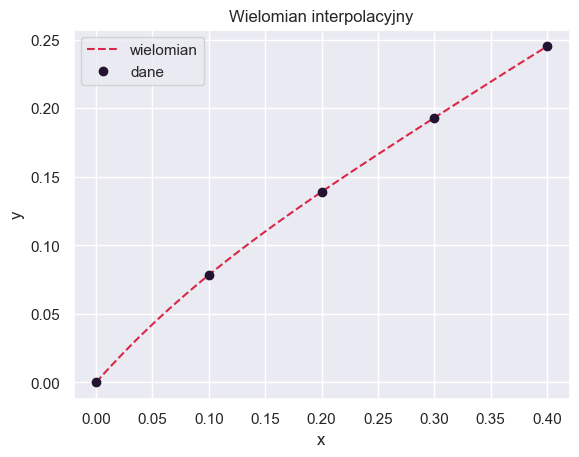

In [238]:
# wykres punktów oraz wielomianu

fig, ax = plt.subplots()
x = np.linspace(0, 0.4, 100)
ax.plot(x, poly(x), label='wielomian', linestyle = '--', color = palette[5])
ax.plot(xs, ys, 'o', label='dane', zorder=10, color = palette[0])
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.set_title('Wielomian interpolacyjny');


# Zadanie 8.

In [130]:
# Dane
xs = np.array([-2.2, -0.3, 0.8, 1.9])
ys = np.array([15.180, 10.962, 1.920, -2.040])

# Dopasowanie wielomianu stopnia n-1 (gdzie n to liczba punktów danych)
coefficients = np.polyfit(xs, ys, len(xs)-1)

# Wielomian
poly = np.poly1d(coefficients)

# Obliczanie pochodnej w punkcie x=0.2
derivative_at_0 = poly.deriv(1)(0)
second_derivative_at_0 = poly.deriv(2)(0)

print("Pochodna w punkcie x=0:", derivative_at_0)
print("Druga pochodna w punkcie x=0:", second_derivative_at_0)


Pochodna w punkcie x=0: -8.559999999999993
Druga pochodna w punkcie x=0: -0.5999999999999965


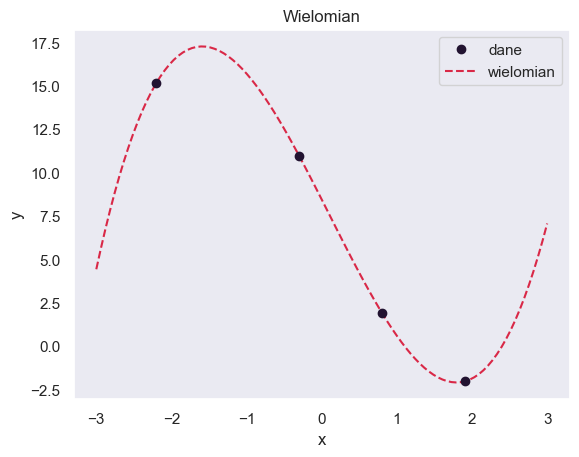

In [131]:
# wykres wielomianu

fig, ax = plt.subplots()
ax.plot(xs, ys, 'o', label='dane', zorder=10, color = palette[0])
ax.plot(np.linspace(-3, 3, 100), poly(np.linspace(-3, 3, 100)), label='wielomian', linestyle = '--', color = palette[5])
ax.set(xlabel='x', ylabel='y')
ax.grid()
ax.legend()
ax.set_title('Wielomian');
